# Data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats

In [35]:
path = "./data/"

df = pd.read_csv(path + "VBM_data.csv")
df=df.drop(columns=['Unnamed: 0'])
df.head()

,Subjectt,Sex,Age,PD,Chr,PSQI,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,PPMI101179,Female,44,1,Nan,0,0.67171,35.8221,481.4425,40.878,...,2.7041,0.025606,-3.4439,1.8278,0.017308,1.4594,0.013820,2.0369,0.019288,-33.034
1,PPMI3130,Male,44,1,Nan,0,0.85944,18.1954,578.9324,36.0925,...,2.9227,0.024967,6.0559,2.2804,0.019481,2.2139,0.018913,2.3358,0.019954,-5.3568
2,PPMI3134,Male,39,1,Nan,0,0.81835,16.9461,598.0345,39.2921,...,2.6008,0.022610,-5.6116,2.3824,0.020711,2.4315,0.021138,2.3343,0.020293,4.0799
3,PPMI3364,Female,39,1,Nan,0,0.75126,28.6519,527.2022,37.5087,...,3.2739,0.029227,-6.6191,2.1569,0.019255,2.1986,0.019627,2.1159,0.018890,3.8304
4,PPMI3400,Female,39,1,Nan,0,0.79245,"169,802",564.1163,39.1742,...,"2,735",0.024220,7.2702,2.3758,0.021039,2.3881,0.021147,2.3646,0.020940,0.98577


In [36]:
from sklearn.preprocessing import LabelEncoder
categ = ['Subjectt','Sex','Chr']

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)
df.head()

,Subjectt,Sex,Age,PD,Chr,PSQI,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,0,0,44,1,2,0,0.67171,35.8221,481.4425,40.878,...,2.7041,0.025606,-3.4439,1.8278,0.017308,1.4594,0.013820,2.0369,0.019288,-33.034
1,1,1,44,1,2,0,0.85944,18.1954,578.9324,36.0925,...,2.9227,0.024967,6.0559,2.2804,0.019481,2.2139,0.018913,2.3358,0.019954,-5.3568
2,2,1,39,1,2,0,0.81835,16.9461,598.0345,39.2921,...,2.6008,0.022610,-5.6116,2.3824,0.020711,2.4315,0.021138,2.3343,0.020293,4.0799
3,3,0,39,1,2,0,0.75126,28.6519,527.2022,37.5087,...,3.2739,0.029227,-6.6191,2.1569,0.019255,2.1986,0.019627,2.1159,0.018890,3.8304
4,4,0,39,1,2,0,0.79245,"169,802",564.1163,39.1742,...,"2,735",0.024220,7.2702,2.3758,0.021039,2.3881,0.021147,2.3646,0.020940,0.98577


# PCA & ICA

In [37]:
#From Sklearn tutorial 
#Need to modify obv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import FastICA
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
plt.style.use('seaborn')


In [38]:
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].apply(lambda x: str(x.replace(",", "")))
        df[column] =df[column].astype("float")

X = df.loc[:, df.columns.drop(["Subjectt","Age", "Sex", "Chr", "PD", "PSQI"])]
#y = df.pop("PD")

In [39]:
#pca = PCA(n_components=0.95)  
#df_pca = pca.fit_transform(X)
pca = PCA()
df_pca = pca.fit_transform(X=X)
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.round(2).head()

(38, 38)


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-55385.42,-86887.73,-34693.11,-8483.58,2728.33,-8332.28,-110475.91,-34713.40,5995.27,-22147.63,...,312.46,-3.49,91.87,35.94,11.55,32.81,44.49,27.02,13.38,0.0
1,-55297.41,-86284.83,-30022.41,-8682.63,2478.44,10642.50,-117648.38,-40808.83,27271.53,-22750.26,...,0.12,-0.00,0.04,0.01,-0.01,-0.01,-0.01,-0.02,0.01,0.0
2,-52763.37,-83520.45,24185.49,85717.17,-32161.15,62269.04,-63358.09,-29808.66,227591.44,148798.72,...,-0.04,-0.02,-0.01,-0.02,-0.01,-0.01,-0.00,-0.00,-0.00,0.0
3,-158373.72,381286.17,6112.82,-41304.12,8120.38,-237144.55,-21153.04,9630.62,3235.49,-47147.71,...,-0.12,0.08,-0.01,-0.02,-0.02,-0.00,-0.01,-0.02,0.01,0.0
4,-157144.90,381226.97,10368.93,-43263.82,9758.80,-243944.04,-24252.09,9320.18,4221.62,-54818.69,...,-0.02,-0.03,-0.04,0.00,0.02,0.02,0.02,0.02,0.00,0.0


In [40]:
df_pca_loadings = pd.DataFrame(pca.components_)
df_pca_loadings.head()

,0,1,2,3,4,5,6,7,8,9,...,917,918,919,920,921,922,923,924,925,926
0,-1.122796e-07,-0.008269,0.416728,-0.001217,-0.044406,-0.000941,1.308956e-08,2.826431e-09,-0.039097,1.918875e-06,...,-0.000196,-4.810017e-07,-0.000139,0.000597,5.882784e-10,-0.000198,4.881153e-10,-0.000225,6.534028e-10,0.000357
1,-3.319774e-08,0.033949,0.074863,-0.004011,-0.142834,-0.003384,1.480228e-07,1.124735e-08,-0.181338,-1.011198e-06,...,0.000362,-1.315619e-06,-0.000645,0.000396,-8.636382e-10,0.000375,1.353220e-10,0.001029,-1.459053e-09,0.006608
2,3.124908e-08,0.001457,0.009710,-0.004878,-0.265526,-0.006560,3.580462e-07,2.279265e-08,0.873650,4.885136e-07,...,-0.000141,-9.348841e-07,-0.001730,-0.000225,1.956757e-09,-0.000261,-4.839583e-10,0.000064,3.088817e-09,-0.021530
3,3.080314e-08,-0.007138,-0.015000,-0.000434,-0.281618,-0.002129,-5.674501e-08,-4.353947e-09,-0.312930,-1.083059e-08,...,-0.000170,-1.987832e-07,-0.001314,-0.000302,8.270718e-10,-0.000075,4.309328e-09,-0.000084,-2.048658e-09,0.005626
4,-1.604772e-08,0.001670,-0.001492,0.009166,-0.672524,0.018391,4.144054e-08,2.683014e-09,0.039927,-2.731946e-08,...,0.000202,-5.156532e-07,0.000403,-0.000833,6.525654e-10,0.000629,8.897894e-10,0.000060,3.043102e-10,-0.000538


In [41]:
X_mean = X - X.mean()
X_mean.head()

,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,Normal Appearing White Matter volume cm3,Normal Appearing White Matter volume %,Abnormal Appearing White Matter volume cm3,Abnormal Appearing White Matter volume %,Grey Matter (GM) volume cm3,Grey Matter (GM) volume %,...,FO left thickness mm,FO left thickness norm.,FO thickness asymmetry,PO total thickness mm,PO total thickness norm.,PO right thickness mm,PO right thickness norm.,PO left thickness mm,PO left thickness norm.,PO thickness asymmetry
0,-0.120275,-4465.063271,-36021.624647,-1696.632542,-44517.265984,-896.356303,-0.012391,0.001582,-40799.784384,-0.940876,...,-158.339468,-0.682963,-58.84686,-163.285779,-0.002354,-151.419595,-0.005287,-108.466768,-0.000781,700.372569
1,0.067455,-4482.689971,-35924.134747,-1701.418042,-44419.676884,-901.132003,-0.111609,-0.008181,-40586.579784,-0.663876,...,-158.120868,-0.683602,-49.34706,-162.833179,-0.000181,-150.665095,-0.000194,-108.167868,-0.000115,728.049769
2,0.026365,-4483.939271,-35905.032647,-1698.218442,-44400.800184,-897.947403,0.113879,0.006833,-40659.431084,-2.796976,...,-158.442768,-0.685959,-61.01456,-162.731179,0.001049,-150.447495,0.002031,-108.169368,0.000224,737.486469
3,-0.040725,-4472.233471,-35975.864947,-1700.001842,-44471.469484,-899.720803,-0.049211,-0.003219,-40660.115184,1.059024,...,-157.769668,-0.679342,-62.02206,-162.956679,-0.000407,-150.680395,0.000520,-108.387768,-0.001179,737.236969
4,0.000465,165301.114629,-35938.950847,-1698.336342,-44434.696784,-898.064903,0.092179,0.006392,-40688.895784,-2.159876,...,2573.956432,-0.684349,-48.13276,-162.737779,0.001377,-150.490895,0.002040,-108.139068,0.000871,734.392339


In [42]:
# Compute PC1 for row 1. 
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])

-55297.40550892038

In [43]:
print(pca.explained_variance_ratio_.round(2)[:10])

[0.29 0.17 0.11 0.09 0.09 0.07 0.06 0.04 0.02 0.02]


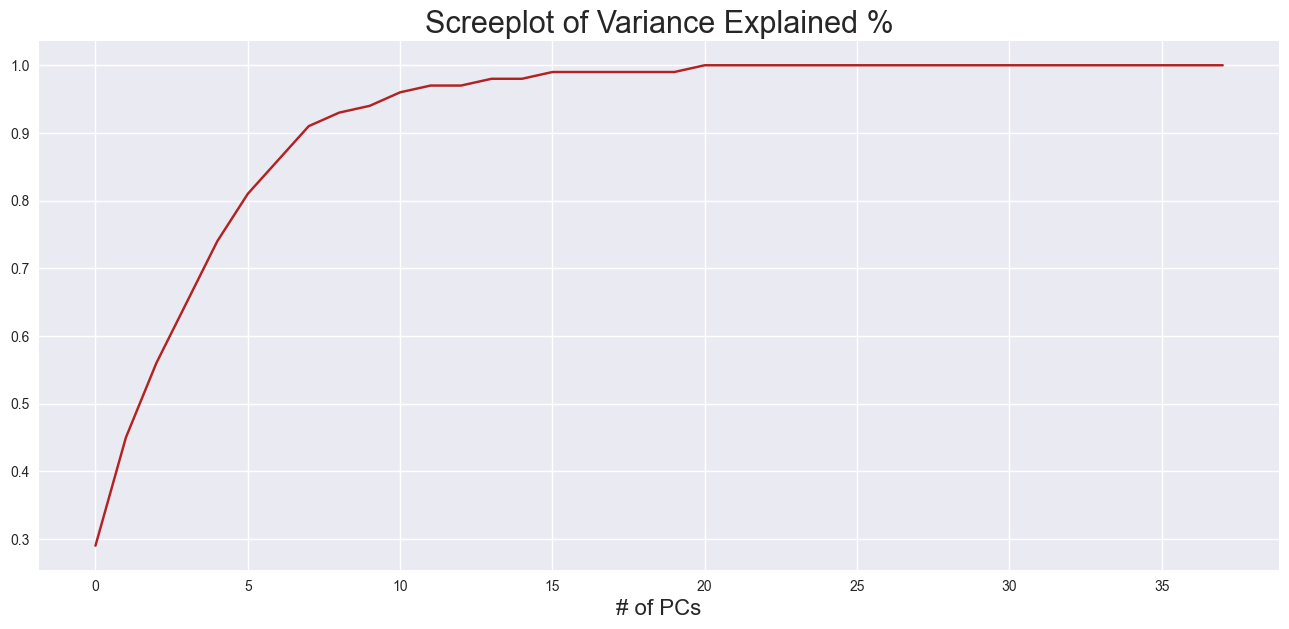

In [44]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [45]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

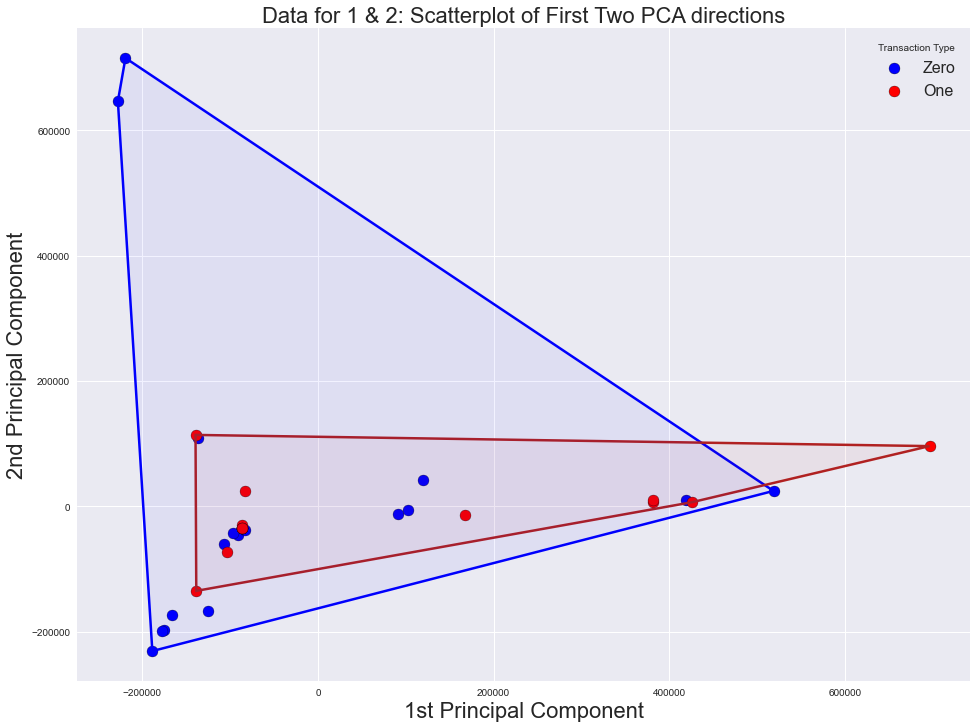

In [46]:
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(16,12))

# Row masks for each category
rows_0 = y==0;
rows_1 = y==1;  

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')

# Encircle the boundaries
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)

# Shading
encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)

# Labels
ax.set_title("Data for 1 & 2: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();


In [49]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    df_pca, x=0, y=1, z=2, color=df['PD'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [15]:
transformer = FastICA(n_components=10,random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(38, 10)

In [27]:

# Combine dimension reduction and tSNE. 
# Allow user to adjust the number of principal components and the perplexity of tSNE.
# Plot interactively.
## Define corresponding func for each of the dimension reduction approaches.
def PCAsm(data, n, max_it):
    name = "PCA"
    pcaer = PCA(n_components=n)
    pcad = pcaer.fit_transform(data)
    df = pd.DataFrame(pcad, index=data.index)
    print("Shape of dimension reduced matrix is:", pcad.shape)
    return df,name

def FastICAsm(data, n, max_it):
    name = "ICA"
    icaer = FastICA(n_components=n, max_iter=max_it)
    icad = icaer.fit_transform(data)
    print("Shape of dimension reduced matrix is:", icad.shape)
    df = pd.DataFrame(icad, index=data.index)
    return df,name

def NMFsm(data, n, max_it):
    name = "NMF"
    nmfer = NMF(n_components=n,max_iter=max_it)
    nmfd = nmfer.fit_transform(data)
    print("Shape of dimension reduced matrix is:", nmfd.shape)
    df = pd.DataFrame(nmfd, index=data.index)
    return df,name

## Define the main func to take in all adjustable variables
## Smush, save the new dataframe in df, and plot the tSNE plot.
def f(data, sm, n = 10,perp = 30, max_it = 600, it = 1000):
    """
    Reduce the dimension of original dataset via PCA, ICA or NMF as chosen by user.
    The output dataframe will be used as input of tSNE.
    Upon activation by interact(), user can choose their desired sm, n, perp, max_it, and it. 
    In current version, tSNE is using 'Manhattan' as the distance matrix and working at learning rate of 1000.
    
    Args:
        sm: str. Name of smusher. Choose from PCA, ICA and NMF
        n: int. Initial number of dimensions. The number of dimensions of smusher processed matrix before tSNE
        perp: int. Perplexity level of tSNE
        max_it: int. Maximum number of iterations in ICA or NMF
        it: int. Maximum number of iterations in tSNE
    """
    df, name = sm(data, n, max_it)
    print("Perplexity level:", perp)
    tsner = TSNE(perplexity=perp,n_iter=it,metric='manhattan')
    tsned = tsner.fit_transform(df)
    plt.figure(figsize=(3,3))
    plt.scatter(tsned[:,0],tsned[:,1], 10, c="y")
    plt.xlabel("tSNE1",fontsize=16)
    plt.ylabel("tSNE2",fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    title = name + ":" + str(n) + " initial dimensions, " + "perplexity level at " + str(perp) + ", " + str(it) + " iterations"
    plt.title(title)

Shape of dimension reduced matrix is: (38, 11)
Perplexity level: 30


/opt/homebrew/Caskroom/miniforge/base/envs/pd_sleep/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/opt/homebrew/Caskroom/miniforge/base/envs/pd_sleep/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/opt/homebrew/Caskroom/miniforge/base/envs/pd_sleep/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



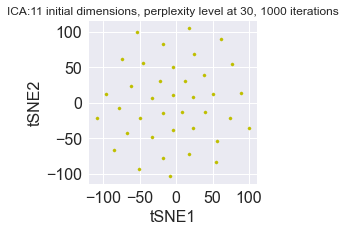

In [28]:
f(data=df, sm=FastICAsm, n = 11,perp = 30, max_it = 600, it = 1000)

In [24]:
pcaer = PCA(n_components=12)
pcad = pcaer.fit_transform(df)


transformer = FastICA(n_components=12,random_state=0)
X_transformed = transformer.fit_transform(pcad)

X_transformed.shape

(38, 12)

In [26]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pcaer.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_transformed,
    labels=labels,
    dimensions=range(4),
    color=y
)
fig.update_traces(diagonal_visible=False)
fig.show()